In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

可延伸標記式語言（**E**xtensible **M**arkup **L**anguage，**XML**），是一種標記式語言。

標記指電腦所能理解的資訊符號，通過此種標記，電腦之間可以處理包含各種資訊的文章等。

In [4]:
# https://github.com/opencv/opencv/tree/4.x/data/haarcascades
# # 臉部辨識.XML : haarcascade_frontalface_default.xml
# # 眼睛辨識檔.XML : haarcascade_eye.xml
# 需自行下載檔案
# face_cascade = cv2.CascadeClassifier('D:\\金融科技\\HW\\github download\\haarcascade_frontalface_default.xml')
# eye_cascade = cv2.CascadeClassifier('D:\\金融科技\\HW\\github download\\haarcascade_eye.xml')

In [6]:
from PIL import Image
import numpy as np
import cv2

# 載入 Haar cascades
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade  = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# 圖片檔案的路徑（字串）
image_path = r'D:\金融科技\HW\圖檔\celebrity.jpg'

# 1. 用 PIL 直接讀檔（Pillow 支援 Unicode 路徑）
pil_img = Image.open(image_path)

# 2. 轉成 numpy 陣列，PIL 讀的是 RGB
img = cv2.cvtColor(np.array(pil_img), cv2.COLOR_RGB2BGR)

# 3. 再轉灰階
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print("成功轉成灰階圖！")

成功轉成灰階圖！


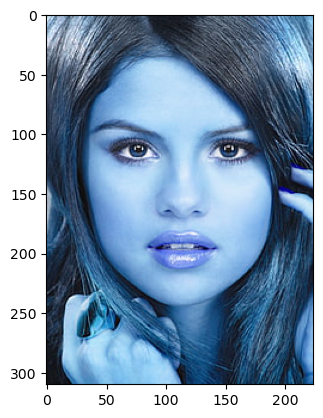

In [8]:
plt.imshow(img)
plt.show()

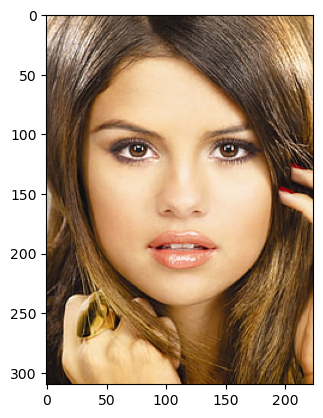

In [10]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [12]:
import random
font = cv2.FONT_HERSHEY_SIMPLEX
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    cv2.putText(img, str(random.randrange(20,30)), (x+(w//2)-18,y-10), font, 1, (14,201,255), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [14]:
# makeupandbeauty.com

In [16]:
# # revised an error
# TypeError: intergel argument expected, got float
# >>將(w/2)改為(w//2)